# Classifying Fashion-MNIST with neural networks



The Fashion MNIST dataset is available in the torchvision library. Each image in this dataset is 28 * 28 pixels and can been classfied into 10 classes of clothing. 

In [15]:
# importing the required libraries

import torch
from torchvision import datasets, transforms
from collections import OrderedDict
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import numpy as np
import time
from torch import nn
from torch import optim
import torch.nn.functional as F


import helper


A trasform is defined to transform the data. First, we need to convert the datatype of the images in the dataset to tensors so that we can use the pytorch methods to process the data. Then, we need to normalize the data so that each element in the tensor would have values in between 0 and 1. This would allow the CNN to train faster as it decreases the skewness in the data.

In [12]:
# Define a transform to normalize the data 
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Download and load the training data

trainset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

# Download and load the test data
testset = datasets.FashionMNIST('F_MNIST_data/', download=True, train=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)

One of the images has been displayed below to help get a feel of the data.

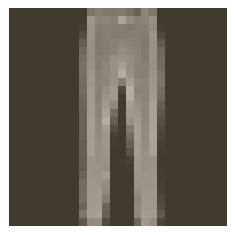

In [14]:
image, label = next(iter(trainloader))
helper.imshow(image[0,:]);


## Building the network

As each image is of dimensions 28*28, the input size is 28 times 28 which is 784. We define 3 hidden layers with 256, 128 and 64 nodes respectively. As there are 10 categories of clothing into which the images can be classified into, the output size is defined as 10. Each of the hidden layers is a fully connected layer where a ReLU function is applied after linear transformation to account for non linearities.


In [17]:
# Hyperparameters for our network
input_size = 784 
hidden_sizes = [256,128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(OrderedDict([
                      ('fc1', nn.Linear(input_size, hidden_sizes[0])),
                      ('relu1', nn.ReLU()),
                      ('fc2', nn.Linear(hidden_sizes[0], hidden_sizes[1])),
                      ('relu2', nn.ReLU()),
                      ('fc3', nn.Linear(hidden_sizes[1], hidden_sizes[2])),
                      ('relu2', nn.ReLU()),
                      ('logits', nn.Linear(hidden_sizes[2], output_size))]))

# Train the network

We need to define a loss criterion to measure and an optimizer function to train our network. Here the criterion chosen is Cross Entropy Loss and the optimizer chosen is Stochastic Gradient Descent.

Cross Entropy Loss gives a measure of the performance of a classification model. The value of this measure increases as the predicted probability diverges from the true label and decreases as the predicted probability converges to the true label. For a 100% accurate model, the cross entropy loss would be 0.

Stochastic gradient descent is an incremental, iterative method that optimizes an objective function. In our case, this objective function is the cross entropy loss. So, our stochastic gradient method minimizes the cross entropy loss of our model as it trains.



In [18]:

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.01) # The defined learning rate is .01


We display and see what the initial weights are. Then we take up a single image, then make one iteration of a forward pass and a backward pass, also called backpropagation, and then print the gradient. Then we take an optimization step to update the parameters.

In [19]:

print('Initial weights - ', model.fc1.weight)

images, labels = next(iter(trainloader))
images.resize_(64, 784)

# Clear the gradients, do this because gradients are accumulated
optimizer.zero_grad()

# Forward pass, then backward pass, then update weights
output = model.forward(images) # forward pass of the network
loss = criterion(output, labels) # computes the loss
loss.backward() # backpropagation
print('Gradient -', model.fc1.weight.grad) # prints the gradients calculated by back propagation
optimizer.step() # computes the new weights, optimizing the loss function considering the gradients obtained from backpropagation

Initial weights -  Parameter containing:
tensor([[ 0.0207, -0.0016,  0.0294,  ..., -0.0183, -0.0028, -0.0284],
        [ 0.0278,  0.0253, -0.0153,  ...,  0.0031,  0.0231, -0.0313],
        [ 0.0142, -0.0083,  0.0169,  ..., -0.0029, -0.0107, -0.0232],
        ...,
        [-0.0102, -0.0128,  0.0150,  ..., -0.0003, -0.0180, -0.0352],
        [-0.0172,  0.0118,  0.0278,  ..., -0.0249, -0.0125,  0.0186],
        [-0.0258,  0.0180, -0.0330,  ..., -0.0142, -0.0267, -0.0348]],
       requires_grad=True)
Gradient - tensor([[-0.0007, -0.0007, -0.0007,  ..., -0.0004, -0.0005, -0.0007],
        [-0.0029, -0.0029, -0.0029,  ..., -0.0025, -0.0025, -0.0029],
        [ 0.0002,  0.0002,  0.0002,  ...,  0.0001,  0.0001,  0.0002],
        ...,
        [-0.0004, -0.0004, -0.0004,  ..., -0.0004, -0.0004, -0.0004],
        [-0.0017, -0.0017, -0.0017,  ..., -0.0017, -0.0017, -0.0017],
        [ 0.0005,  0.0005,  0.0005,  ...,  0.0003,  0.0003,  0.0005]])


Now we train the model for 15 epochs

In [22]:
optimizer = optim.SGD(model.parameters(), lr=0.003)
epochs = 15
print_every = 40
steps = 0
for e in range(epochs):
    running_loss = 0
    for images, labels in iter(trainloader):
        steps += 1
        # Flatten MNIST images into a 784 long vector
        images.resize_(images.size()[0], 784)
        
        optimizer.zero_grad()
        
        # Forward and backward passes
        output = model.forward(images)
        loss = criterion(output, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        
        if steps % print_every == 0:
            print("Epoch: {}/{}... ".format(e+1, epochs),
                  "Loss: {:.4f}".format(running_loss/print_every))
            
            running_loss = 0

Epoch: 1/15...  Loss: 2.2800
Epoch: 1/15...  Loss: 2.2603
Epoch: 1/15...  Loss: 2.2288
Epoch: 1/15...  Loss: 2.1976
Epoch: 1/15...  Loss: 2.1682
Epoch: 1/15...  Loss: 2.1290
Epoch: 1/15...  Loss: 2.0921
Epoch: 1/15...  Loss: 2.0430
Epoch: 1/15...  Loss: 1.9847
Epoch: 1/15...  Loss: 1.9321
Epoch: 1/15...  Loss: 1.8668
Epoch: 1/15...  Loss: 1.8104
Epoch: 1/15...  Loss: 1.7458
Epoch: 1/15...  Loss: 1.6969
Epoch: 1/15...  Loss: 1.6144
Epoch: 1/15...  Loss: 1.5676
Epoch: 1/15...  Loss: 1.4871
Epoch: 1/15...  Loss: 1.4465
Epoch: 1/15...  Loss: 1.4003
Epoch: 1/15...  Loss: 1.3619
Epoch: 1/15...  Loss: 1.2955
Epoch: 1/15...  Loss: 1.2407
Epoch: 1/15...  Loss: 1.2256
Epoch: 2/15...  Loss: 0.6404
Epoch: 2/15...  Loss: 1.1467
Epoch: 2/15...  Loss: 1.1179
Epoch: 2/15...  Loss: 1.0829
Epoch: 2/15...  Loss: 1.0688
Epoch: 2/15...  Loss: 1.0284
Epoch: 2/15...  Loss: 0.9952
Epoch: 2/15...  Loss: 0.9881
Epoch: 2/15...  Loss: 0.9288
Epoch: 2/15...  Loss: 0.9399
Epoch: 2/15...  Loss: 0.9111
Epoch: 2/15...

Epoch: 13/15...  Loss: 0.2621
Epoch: 13/15...  Loss: 0.4406
Epoch: 13/15...  Loss: 0.4211
Epoch: 13/15...  Loss: 0.4150
Epoch: 13/15...  Loss: 0.4096
Epoch: 13/15...  Loss: 0.4319
Epoch: 13/15...  Loss: 0.4138
Epoch: 13/15...  Loss: 0.4410
Epoch: 13/15...  Loss: 0.4584
Epoch: 13/15...  Loss: 0.4524
Epoch: 13/15...  Loss: 0.4280
Epoch: 13/15...  Loss: 0.4271
Epoch: 13/15...  Loss: 0.4533
Epoch: 13/15...  Loss: 0.4169
Epoch: 13/15...  Loss: 0.4379
Epoch: 13/15...  Loss: 0.4374
Epoch: 13/15...  Loss: 0.4360
Epoch: 13/15...  Loss: 0.4831
Epoch: 13/15...  Loss: 0.4682
Epoch: 13/15...  Loss: 0.4374
Epoch: 13/15...  Loss: 0.4453
Epoch: 13/15...  Loss: 0.4340
Epoch: 13/15...  Loss: 0.4216
Epoch: 14/15...  Loss: 0.0603
Epoch: 14/15...  Loss: 0.4340
Epoch: 14/15...  Loss: 0.4354
Epoch: 14/15...  Loss: 0.4352
Epoch: 14/15...  Loss: 0.4236
Epoch: 14/15...  Loss: 0.4636
Epoch: 14/15...  Loss: 0.4148
Epoch: 14/15...  Loss: 0.4210
Epoch: 14/15...  Loss: 0.4256
Epoch: 14/15...  Loss: 0.4284
Epoch: 14/

We can see that the loss is approximately .4 on the training set. Now, we test the model with the test data set.

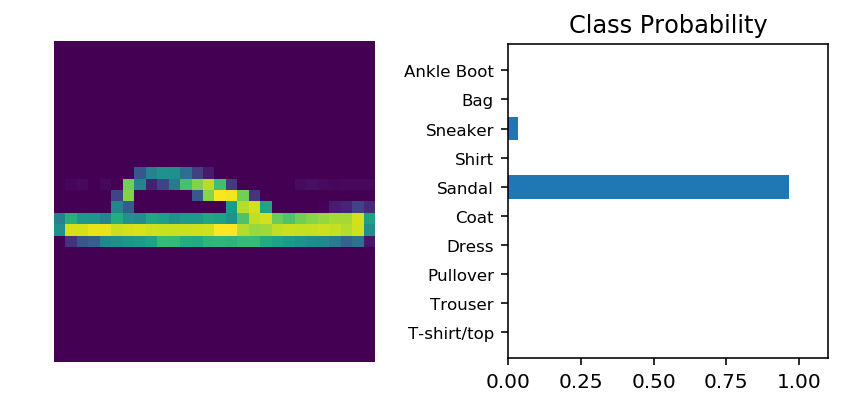

In [31]:
# Test out your network!

dataiter = iter(testloader)
images, labels = dataiter.next()
img = images[0]
# Convert 2D image to 1D vector
img = img.resize_(1, 784)


# Turn off gradients to speed up this part
with torch.no_grad():
    logits = model.forward(img)
ps = F.softmax(logits, dim=1)

# Plot the image and probabilities
helper.view_classify(img.resize_(1, 28, 28), ps, version = "Fashion")

We can see that the neural network has accurately classified the clothing as a sandal giving it the highest probability. A very low probability has been assigned to sneaker. This is because sneakers are next closest category to the sandal in the image.